Metodo delle forze in forma matriciale:
https://www.matematicamente.it/staticfiles/approfondimenti/ingegneria/il-metodo-delle-forze-in-forma-matriciale.pdf

In [1]:
#Dati problema
#Sinistra appoggio
#Destra incastro
#6 campate

l1=3.00
l2=4.50
l3=4.00
l4=5.00
l5=6.15
l6=4.00
ltot=l1+l2+l3+l4+l5+l6
nCampate=6
j=(0.3 * 0.5**3)/12 #m4
ej=31476*1000000*j/1000 #Mpa * m4 -> N*m2 -> kN*m2
ej

98362.5000000000

In [2]:
I=identity_matrix(nCampate)

In [3]:
#Generica 7x7
L1,L2,L3,L4,L5,L6,EJ=var('L1,L2,L3,L4,L5,L6,EJ')
flex_gen=matrix([
[1/3*L1,1/6*L1,0,0,0,0,0],
[1/6*L1,1/3*L1+1/3*L2,1/6*L2,0,0,0,0],
[0,1/6*L2,1/3*L2+1/3*L3,1/6*L3,0,0,0],
[0,0,1/6*L3,1/3*L3+1/3*L4,1/6*L4,0,0],
[0,0,0,1/6*L4,1/3*L4+1/3*L5,1/6*L5,0],
[0,0,0,0,1/6*L5,1/3*L5+1/3*L6,1/6*L6],
[0,0,0,0,0,+1/6*L6,1/3*L6]
])*1/(EJ)
#flex_gen[:,0]=0 #prima colonna
#flex_gen[0,:]=0 #prima riga
#flex_gen[:,6]=0 #ultima colonna
#flex_gen[6,:]=0 #ultima riga
show(flex_gen)

[       1/3*L1/EJ        1/6*L1/EJ                0                0                0                0                0]
[       1/6*L1/EJ 1/3*(L1 + L2)/EJ        1/6*L2/EJ                0                0                0                0]
[               0        1/6*L2/EJ 1/3*(L2 + L3)/EJ        1/6*L3/EJ                0                0                0]
[               0                0        1/6*L3/EJ 1/3*(L3 + L4)/EJ        1/6*L4/EJ                0                0]
[               0                0                0        1/6*L4/EJ 1/3*(L4 + L5)/EJ        1/6*L5/EJ                0]
[               0                0                0                0        1/6*L5/EJ 1/3*(L5 + L6)/EJ        1/6*L6/EJ]
[               0                0                0                0                0        1/6*L6/EJ        1/3*L6/EJ]

In [4]:
#A sinistra c'é appoggio quindi va tolta prima riga e colonna
flex=flex_gen.submatrix(1,1,6,6)
show(flex)

[1/3*(L1 + L2)/EJ        1/6*L2/EJ                0                0                0                0]
[       1/6*L2/EJ 1/3*(L2 + L3)/EJ        1/6*L3/EJ                0                0                0]
[               0        1/6*L3/EJ 1/3*(L3 + L4)/EJ        1/6*L4/EJ                0                0]
[               0                0        1/6*L4/EJ 1/3*(L4 + L5)/EJ        1/6*L5/EJ                0]
[               0                0                0        1/6*L5/EJ 1/3*(L5 + L6)/EJ        1/6*L6/EJ]
[               0                0                0                0        1/6*L6/EJ        1/3*L6/EJ]

In [5]:
F=flex.substitute(L1=l1,L2=l2,L3=l3,L4=l4,L5=l5,L6=l6,EJ=ej)
F

[0.0000254161901131021   7.62485703393061e-6                     0                     0                     0                     0]
[  7.62485703393061e-6 0.0000288050154615157   6.77765069682721e-6                     0                     0                     0]
[                    0   6.77765069682721e-6 0.0000304994281357225   8.47206337103402e-6                     0                     0]
[                    0                     0   8.47206337103402e-6 0.0000377854026348117 0.0000104206379463718                     0]
[                    0                     0                     0 0.0000104206379463718 0.0000343965772863981   6.77765069682721e-6]
[                    0                     0                     0                     0   6.77765069682721e-6 0.0000135553013936544]

In [6]:
P_gen_sx=matrix([L1^3/24,L2^3/24,L3^3/24,L4^3/24,L5^3/24,L6^3/24,0])
P_gen_dx=matrix([0,L1^3/24,L2^3/24,L3^3/24,L4^3/24,L5^3/24,L6^3/24])
show(P_gen_sx+P_gen_dx)
#TODO

[            1/24*L1^3 1/24*L1^3 + 1/24*L2^3 1/24*L2^3 + 1/24*L3^3 1/24*L3^3 + 1/24*L4^3 1/24*L4^3 + 1/24*L5^3 1/24*L5^3 + 1/24*L6^3             1/24*L6^3]

In [7]:
Q1,Q2,Q3,Q4,Q5,Q6=var('Q1,Q2,Q3,Q4,Q5,Q6')
P_gen=matrix([
        [Q1*L1^3],
        [Q1*L1^3+Q2*L2^3],
        [Q2*L2^3+Q3*L3^3],
        [Q3*L3^3+Q4*L4^3],
        [Q4*L4^3+Q5*L5^3],
        [Q5*L5^3+Q6*L6^3],
                [Q6*L6^3]
    ])*1/(24*EJ)
show(P_gen)

[            1/24*L1^3*Q1/EJ]
[1/24*(L1^3*Q1 + L2^3*Q2)/EJ]
[1/24*(L2^3*Q2 + L3^3*Q3)/EJ]
[1/24*(L3^3*Q3 + L4^3*Q4)/EJ]
[1/24*(L4^3*Q4 + L5^3*Q5)/EJ]
[1/24*(L5^3*Q5 + L6^3*Q6)/EJ]
[            1/24*L6^3*Q6/EJ]

In [8]:
P_gen[[1..6],[0]]

[1/24*(L1^3*Q1 + L2^3*Q2)/EJ]
[1/24*(L2^3*Q2 + L3^3*Q3)/EJ]
[1/24*(L3^3*Q3 + L4^3*Q4)/EJ]
[1/24*(L4^3*Q4 + L5^3*Q5)/EJ]
[1/24*(L5^3*Q5 + L6^3*Q6)/EJ]
[            1/24*L6^3*Q6/EJ]

### P1

In [9]:
P1=P_gen[[1..6],[0]].substitute(Q1=1,Q2=0,Q3=0,Q4=0,Q5=0,Q6=0,L1=l1,EJ=ej) #Tolgo la prima riga e sostituisco il carico unitario Q1 e gli altri zero
show(P1)

[0.0000114372855508959]
[                    0]
[                    0]
[                    0]
[                    0]
[                    0]

In [10]:
X1=matrix(F\-P1)
X1

[  -0.491338912574569]
[   0.137796375248564]
[ -0.0328783181600082]
[ 0.00812484517717799]
[-0.00273048075626473]
[ 0.00136524037813237]

In [11]:
#Aggiungo 0 per tornare alla dimesione originale
x1=matrix([0]).stack(X1) 
show(x1)

[                   0]
[  -0.491338912574569]
[   0.137796375248564]
[ -0.0328783181600082]
[ 0.00812484517717799]
[-0.00273048075626473]
[ 0.00136524037813237]

In [12]:
x1=x1.list()
R1=matrix([
        [((x1[1]-x1[0])/l1)+l1/2],
        [((x1[2]-x1[1])/l2)],
        [((x1[3]-x1[2])/l3)],
        [((x1[4]-x1[3])/l4)],
        [((x1[5]-x1[4])/l5)],
        [((x1[6]-x1[5])/l6)],
    ]); R1

[    1.33622036247514]
[   0.139807841738474]
[ -0.0426686733521432]
[ 0.00820063266743724]
[-0.00176509364771426]
[ 0.00102393028359927]

In [13]:
xxx1=x1
xxx1

[0,
 -0.491338912574569,
 0.137796375248564,
 -0.0328783181600082,
 0.00812484517717799,
 -0.00273048075626473,
 0.00136524037813237]

In [14]:
rrr1=R1.list()
rrr1

[1.33622036247514,
 0.139807841738474,
 -0.0426686733521432,
 0.00820063266743724,
 -0.00176509364771426,
 0.00102393028359927]

In [15]:
lung=(matrix([0,l1,l1+l2,l1+l2+l3,l1+l2+l3+l4,l1+l2+l3+l4+l5,l1+l2+l3+l4+l5+l6]))
lung=lung.list()
lung

[0.000000000000000,
 3.00000000000000,
 7.50000000000000,
 11.5000000000000,
 16.5000000000000,
 22.6500000000000,
 26.6500000000000]

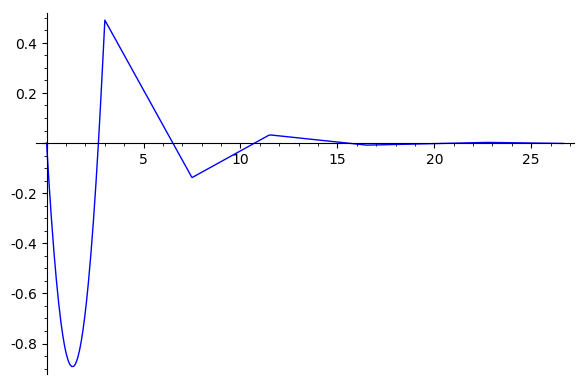

In [16]:
M1=-( #I[i,j]  i è lo stesso indice di M, j va a 0 a n-1.                           j                      j+1 
((xxx1[0] + rrr1[0] * (x-lung[0])) - (I[0,0]*(x-lung[0])**2)/2) * (heaviside(x-lung[0]) - heaviside(x-lung[1]))  +
((xxx1[1] + rrr1[1] * (x-lung[1])) - (I[0,1]*(x-lung[0])**2)/2) * (heaviside(x-lung[1]) - heaviside(x-lung[2])) +
((xxx1[2] + rrr1[2] * (x-lung[2])) - (I[0,2]*(x-lung[0])**2)/2) * (heaviside(x-lung[2]) - heaviside(x-lung[3])) +
((xxx1[3] + rrr1[3] * (x-lung[3])) - (I[0,3]*(x-lung[0])**2)/2) * (heaviside(x-lung[3]) - heaviside(x-lung[4])) +
((xxx1[4] + rrr1[4] * (x-lung[4])) - (I[0,4]*(x-lung[0])**2)/2) * (heaviside(x-lung[4]) - heaviside(x-lung[5])) +
((xxx1[5] + rrr1[5] * (x-lung[5])) - (I[0,5]*(x-lung[0])**2)/2) * (heaviside(x-lung[5]) - heaviside(x-lung[6])) 
)
plotCampata1=plot(M1,0,ltot)
plotCampata1

In [17]:
def momento(F,Pi,xi,Ri,nCampata):
    xxxi=xi
    rrri=Ri.list()
    i=nCampata
    Mi=-( 
((xxxi[0] + rrri[0] * (x-lung[0])) - (I[i-1,0]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[0]) - heaviside(x-lung[1])) +
((xxxi[1] + rrri[1] * (x-lung[1])) - (I[i-1,1]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[1]) - heaviside(x-lung[2])) +
((xxxi[2] + rrri[2] * (x-lung[2])) - (I[i-1,2]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[2]) - heaviside(x-lung[3])) +
((xxxi[3] + rrri[3] * (x-lung[3])) - (I[i-1,3]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[3]) - heaviside(x-lung[4])) +
((xxxi[4] + rrri[4] * (x-lung[4])) - (I[i-1,4]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[4]) - heaviside(x-lung[5])) +
((xxxi[5] + rrri[5] * (x-lung[5])) - (I[i-1,5]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[5]) - heaviside(x-lung[6])) 
)
    return Mi

#### CAMPATA 2

In [18]:
P2=P_gen[[1..6],[0]].substitute(Q1=0,Q2=1,Q3=0,Q4=0,Q5=0,Q6=0,L1=l1,L2=l2,EJ=ej)

X2=matrix(F\-P2)
x2=matrix([0]).stack(X2)
x2=x2.list()

R2=matrix([
        [((x2[1]-x2[0])/l1)],
        [((x2[2]-x2[1])/l2)+l2/2],
        [((x2[3]-x2[2])/l3)],
        [((x2[4]-x2[3])/l4)],
        [((x2[5]-x2[4])/l5)],
        [((x2[6]-x2[5])/l6)],
    ]); R2

[  -0.397735354491756]
[    2.27401324630952]
[   0.336015802648127]
[ -0.0645799822560683]
[  0.0139001124757498]
[-0.00806345098334429]

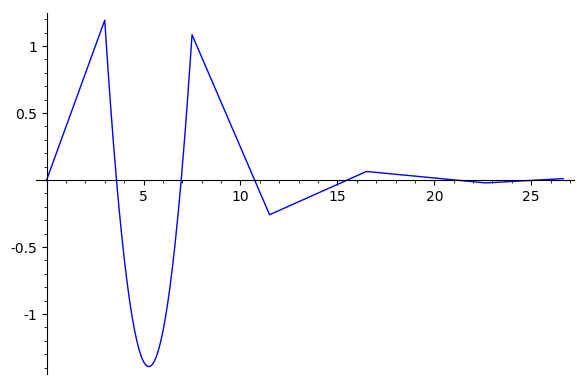

In [19]:
M2=momento(F,P2,x2,R2,2)
plot(M2,0,ltot)

### CAMPATA 3

In [20]:
P3=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=1,Q4=0,Q5=0,Q6=0,L1=l1,L2=l2,L3=l3,EJ=ej)

X3=matrix(F\-P3)
x3=matrix([0]).stack(X3) 
x3=x3.list()
R3=matrix([
        [((x3[1]-x3[0])/l1)],
        [((x3[2]-x3[1])/l2)],
        [((x3[3]-x3[2])/l3)+l3/2],
        [((x3[4]-x3[3])/l4)],
        [((x3[5]-x3[4])/l5)],
        [((x3[6]-x3[5])/l6)],
    ]); R3

[ 0.0828982179465136]
[ -0.239483740734372]
[   2.01809373915562]
[  0.188715793729667]
[-0.0406189451770295]
[ 0.0235630376373957]

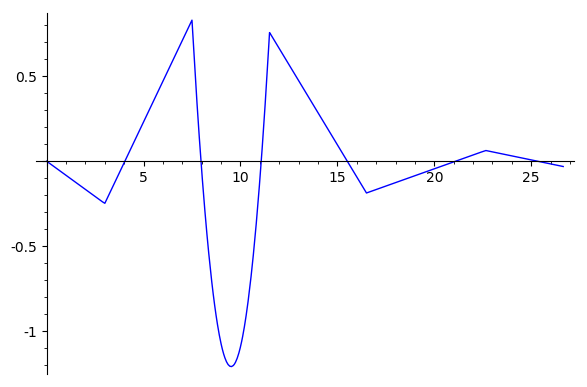

In [21]:
M3=momento(F,P3,x3,R3,3)
plot(M3,0,ltot)

### CAMPATA 4

In [22]:
P4=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=0,Q4=1,Q5=0,Q6=0,L1=l1,L2=l2,L3=l3,L4=l4,EJ=ej)

X4=matrix(F\-P4)
x4=matrix([0]).stack(X4) 
x4=x4.list()

R4=matrix([
        [((x4[1]-x4[0])/l1)],
        [((x4[2]-x4[1])/l2)],
        [((x4[3]-x4[2])/l3)],
        [((x4[4]-x4[3])/l4)+l4/2],
        [((x4[5]-x4[4])/l5)],
        [((x4[6]-x4[5])/l6)],
    ]); R4

[-0.0381998039858491]
[  0.110354989292453]
[ -0.469141342701209]
[   2.56388225809328]
[  0.255298460080277]
[ -0.148098558380157]

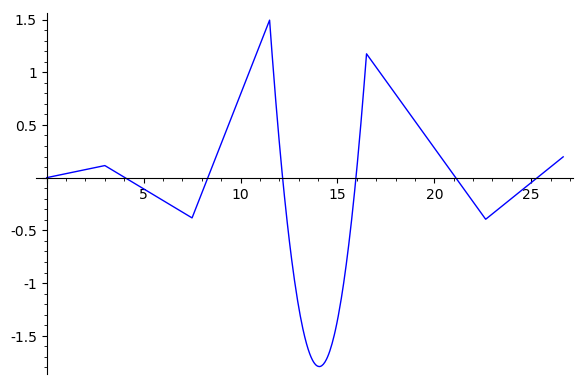

In [23]:
M4=momento(F,P4,x4,R4,4)
plot(M4,0,ltot)

### CAMPATA 5

In [24]:
P5=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=0,Q4=0,Q5=1,Q6=0,L1=l1,L2=l2,L3=l3,L4=l4,L5=l5,EJ=ej)

x5=matrix(F\-P5)
x5=matrix([0]).stack(x5) 
x5=x5.list()

R5=matrix([
        [((x5[1]-x5[0])/l1)],
        [((x5[2]-x5[1])/l2)],
        [((x5[3]-x5[2])/l3)],
        [((x5[4]-x5[3])/l4)],
        [((x5[5]-x5[4])/l5)+l5/2],
        [((x5[6]-x5[5])/l6)],
    ]); R5

[ 0.0154910412605734]
[-0.0447518969749899]
[  0.190249350481418]
[ -0.532814364157423]
[   3.00538904775310]
[  0.932284570419607]

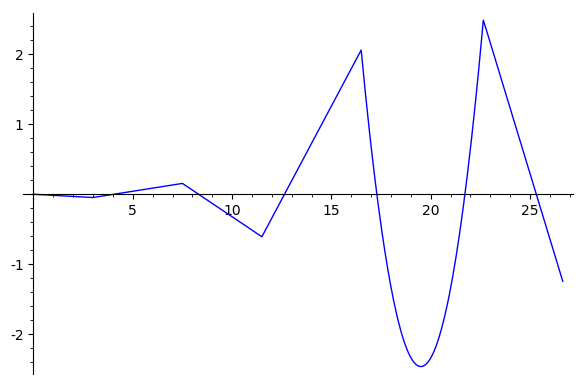

In [25]:
M5=momento(F,P5,x5,R5,5)
plot(M5,0,ltot)

### CAMPATA 6

In [26]:
P6=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=0,Q4=0,Q5=0,Q6=1,L1=l1,L2=l2,L3=l3,L4=l4,L5=l5,L6=l6,EJ=ej)

x6=matrix(F\-P6)
x6=matrix([0]).stack(x6) 
x6=x6.list()

R6=matrix([
        [((x6[1]-x6[0])/l1)],
        [((x6[2]-x6[1])/l2)],
        [((x6[3]-x6[2])/l3)],
        [((x6[4]-x6[3])/l4)],
        [((x6[5]-x6[4])/l5)],
        [((x6[6]-x6[5])/l6)+l6/2],
    ]); R6

[-0.00107870844691940]
[ 0.00311626884665605]
[ -0.0132478881137289]
[  0.0371021770317928]
[  -0.102215486248930]
[    1.68199455872163]

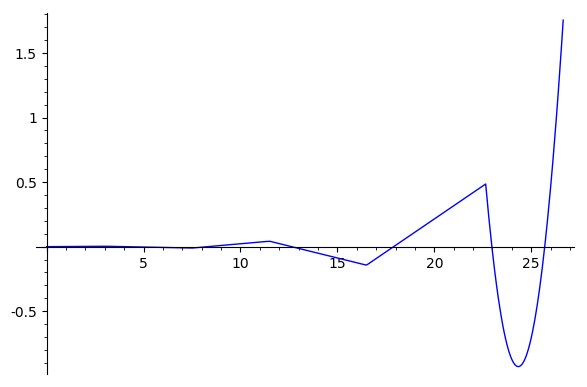

In [27]:
M6=momento(F,P6,x6,R6,6)
plot(M6,0,ltot)

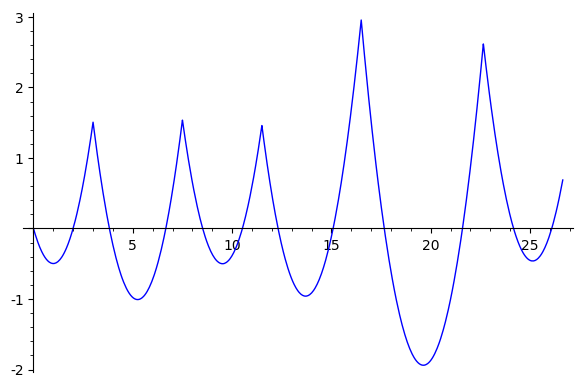

In [28]:
plot(M1+M2+M3+M4+M5+M6,0,ltot)

# Combinazioni per massimizzare gli effetti ad appoggi e campate
123456 numero campate

In campata 4 vanno i carichi B perché la lunghezza è diversa

SFSFSF campate dispari

FSFSFS campate pari

SSFSFS appoggi tra le due SS

FSSFSF

SFSSFS

FSFSSF

SFSFSS

## SLU


In [29]:
#Il vento deve ancora essere aggiunto

#Campate 1,2,3,5,6
SLU_S_A=101.879
SLU_F_A=42.61

#Campata 4 con M4
SLU_S_B=82.939
SLU_F_B=36.398

In [30]:
SLU_m1 = SLU_S_A*M1 + SLU_F_A*M2 + SLU_S_A*M3 + SLU_F_B*M4 + SLU_S_A*M5 + SLU_F_A*M6
SLU_m2 = SLU_F_A*M1 + SLU_S_A*M2 + SLU_F_A*M3 + SLU_S_B*M4 + SLU_F_A*M5 + SLU_S_A*M6
SLU_m3 = SLU_S_A*M1 + SLU_S_A*M2 + SLU_F_A*M3 + SLU_S_B*M4 + SLU_F_A*M5 + SLU_S_A*M6
SLU_m4 = SLU_F_A*M1 + SLU_S_A*M2 + SLU_S_A*M3 + SLU_F_B*M4 + SLU_S_A*M5 + SLU_F_A*M6
SLU_m5 = SLU_S_A*M1 + SLU_F_A*M2 + SLU_S_A*M3 + SLU_S_B*M4 + SLU_F_A*M5 + SLU_S_A*M6
SLU_m6 = SLU_F_A*M1 + SLU_S_A*M2 + SLU_F_A*M3 + SLU_S_B*M4 + SLU_S_A*M5 + SLU_F_A*M6
SLU_m7 = SLU_S_A*M1 + SLU_F_A*M2 + SLU_S_A*M3 + SLU_F_B*M4 + SLU_S_A*M5 + SLU_S_A*M6

In [93]:
SLU_p1=plot(SLU_m1,0,ltot,color='green')
SLU_p2=plot(SLU_m2,0,ltot,color='red')
SLU_p3=plot(SLU_m3,0,ltot,color='orange')
SLU_p4=plot(SLU_m4,0,ltot,color='blue')
SLU_p5=plot(SLU_m5,0,ltot,color='grey')
SLU_p6=plot(SLU_m6,0,ltot,color='black')
SLU_p7=plot(SLU_m7,0,ltot,color='violet')

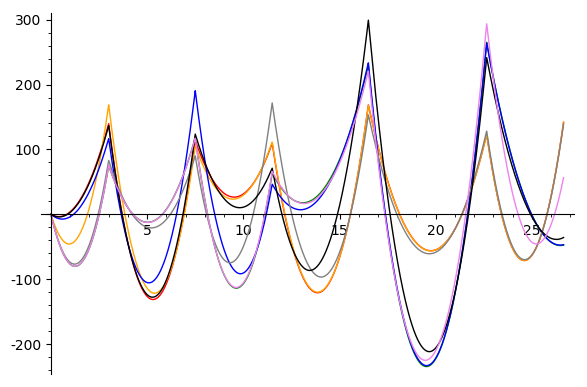

In [94]:
SLU_ptot=SLU_p1+SLU_p2+SLU_p3+SLU_p4+SLU_p5+SLU_p6+SLU_p7; SLU_ptot

In [34]:
SLU_max=max_symbolic(SLU_m1,SLU_m2,SLU_m3,SLU_m4,SLU_m5,SLU_m6,SLU_m7)

In [35]:
SLU_min=min_symbolic(SLU_m1,SLU_m2,SLU_m3,SLU_m4,SLU_m5,SLU_m6,SLU_m7)

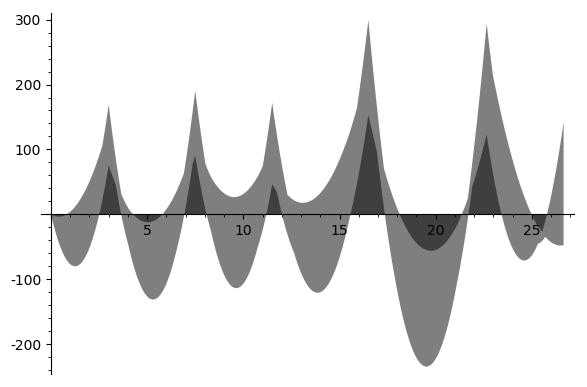

In [116]:
plot([SLU_max,SLU_min],0,ltot,fill=True,fillcolor='black',alpha=0)   #?? fill=[0,max(SLU_max,SLU_min)]

In [36]:
#SLU_maxmax=max_symbolic(SLU_max,SLU_min)

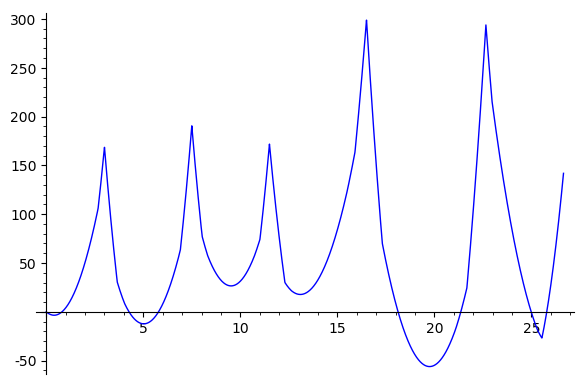

In [39]:
#plot(SLU_maxmax,0,ltot)

In [37]:
#SLU_minmin=min_symbolic(SLU_max,SLU_min)

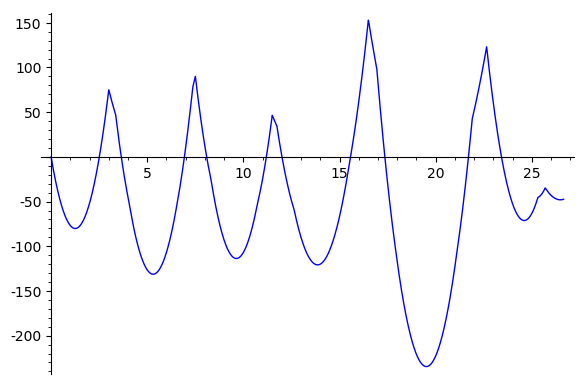

In [52]:
#plot(SLU_minmin,0,ltot)

In [49]:
find_local_maximum(SLU_max,0,ltot)

(299.2308858071833, 16.500000016826302)

In [40]:
find_local_minimum(SLU_minmin,0,ltot) #boh non trova il vero minimo che vale oltre -200

(-113.69812136516826, 9.633060572869391)

In [67]:
latex(
    table(
        rows=[
            [find_local_maximum(SLU_max,lung[0],lung[1])[0],      find_local_minimum(SLU_min,lung[0],lung[1])[0]],
            [find_local_maximum(SLU_max,lung[1],lung[2])[0],      find_local_minimum(SLU_min,lung[1],lung[2])[0]],
            [find_local_maximum(SLU_max,lung[2],lung[3])[0],      find_local_minimum(SLU_min,lung[2],lung[3])[0]],
            [find_local_maximum(SLU_max,lung[3],lung[4])[0],      find_local_minimum(SLU_min,lung[3],lung[4])[0]],
            [find_local_maximum(SLU_max,lung[4],lung[5])[0],      find_local_minimum(SLU_min,lung[4],lung[5])[0]],
            [find_local_maximum(SLU_max,lung[5],lung[6])[0],      find_local_minimum(SLU_min,lung[5],lung[6])[0]],
        ]
    )
)

\begin{tabular}{ll}
$168.87709366178407$ & $-80.12382591824122$ \\
$190.55646964050115$ & $-131.25407921245363$ \\
$190.5564767315737$ & $-113.69812136516826$ \\
$299.2307939161939$ & $-120.79740559703538$ \\
$299.23073564626003$ & $-234.56881748235654$ \\
$294.11311129658293$ & $-71.18276946790614$ \\
\end{tabular}

In [96]:
table(
        rows=[
            [find_local_maximum(SLU_max,lung[0],lung[1])[0],      find_local_minimum(SLU_min,lung[0],lung[1])[0]],
            [find_local_maximum(SLU_max,lung[1],lung[2])[0],      find_local_minimum(SLU_min,lung[1],lung[2])[0]],
            [find_local_maximum(SLU_max,lung[2],lung[3])[0],      find_local_minimum(SLU_min,lung[2],lung[3])[0]],
            [find_local_maximum(SLU_max,lung[3],lung[4])[0],      find_local_minimum(SLU_min,lung[3],lung[4])[0]],
            [find_local_maximum(SLU_max,lung[4],lung[5])[0],      find_local_minimum(SLU_min,lung[4],lung[5])[0]],
            [find_local_maximum(SLU_max,lung[5],lung[6])[0],      find_local_minimum(SLU_min,lung[5],lung[6])[0]],
        ]
)

,
,
,
,
,
,


In [97]:
find_local_maximum(SLU_max,lung[0],lung[1])[0]

168.87709366178407

In [99]:
find_local_maximum(SLU_max,lung[1]-2,lung[1]+2)[0]

168.87710878781